In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
x = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [10]:
from scipy.stats import zscore

scale = x.apply(zscore)
scale.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372


In [11]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [12]:
scale.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scale, y, test_size=0.3, random_state=11)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [15]:
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [16]:
y_pred = model.predict(x_test)

In [22]:
print('Score: ',
np.around(model.score(x_test, y_test) * 100, 2), '%')

Score:  90.64 %


In [21]:
from sklearn.model_selection import cross_val_score
cross = np.around(cross_val_score(model,scale,y,cv=10) * 100,2)

print('Average Cross Val Score', np.around(np.mean(cross), 2), '%')

Average Cross Val Score 91.56 %


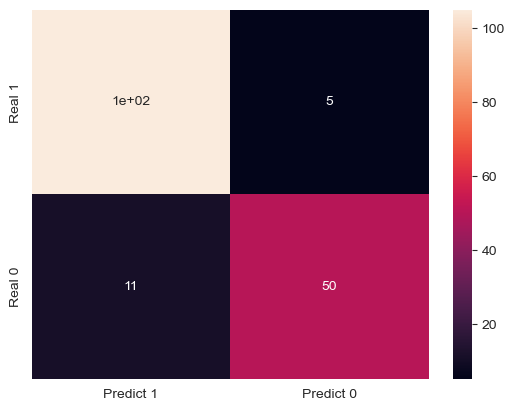

In [25]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test,
                                     y_pred,
                                     labels=[1,0])

confusion_df = pd.DataFrame(confusion,
                            index=['Real 1', 'Real 0'],
                            columns=['Predict 1' , 'Predict 0'])

sns.heatmap(confusion_df,annot = True)
plt.show()

In [29]:
k = 50
scores = np.zeros(shape=k)

for n in range(1, k+1):
    KNNs = KNeighborsClassifier(n_neighbors=n,weights='distance')
    score_n = cross_val_score(KNNs, scale , y , cv = 10)
    scores[n-1] = score_n.mean()
scores

array([0.88746867, 0.88746867, 0.89974937, 0.90150376, 0.91557018,
       0.9120614 , 0.91381579, 0.91209273, 0.92086466, 0.91557018,
       0.91911028, 0.92437343, 0.91904762, 0.92258772, 0.91732456,
       0.91732456, 0.91907895, 0.91732456, 0.91732456, 0.92086466,
       0.91911028, 0.92440476, 0.92261905, 0.92440476, 0.92089599,
       0.92440476, 0.92440476, 0.92440476, 0.91911028, 0.92265038,
       0.92089599, 0.92440476, 0.92265038, 0.92615915, 0.92615915,
       0.92615915, 0.92794486, 0.92969925, 0.92619048, 0.92794486,
       0.92794486, 0.92619048, 0.92794486, 0.92797619, 0.92797619,
       0.92973058, 0.92794486, 0.92973058, 0.9262218 , 0.92797619])